In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [20]:
# Load dataset
file_path = 'sorted_stock_data_cleaned_nica.csv'
data_all = pd.read_csv(file_path)

In [21]:

# Train-Test Split
data_train = data_all[:int(len(data_all)*0.80)]
data_test = data_all[int(len(data_all)*0.80):]


In [22]:
# # Convert data into sequences
# def create_sequences(data_test, seq_length=100):
#     X, y = [], []
#     for i in range(len(data_test) - seq_length):
#         X.append(data_test[i:i+seq_length])
#         y.append(data_test[i+seq_length])
#     return np.array(X), np.array(y)

# seq_length = 100  # Lookback period
# X_test, y_test = create_sequences(data_scaled, seq_length)

In [23]:
# data=data_train

In [24]:
# data.shape, data_test.shape

In [25]:
# Display dataset info
# display(data.head())

In [26]:
# Ensure the dataset has the required 8 features
# assert len(data.columns) == 9, "Dataset should have exactly 8 features!"

In [27]:
# Normalize the dataset
scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)
data_test_scaled=scaler.fit_transform(data_test)

In [28]:
data_test_scaled.shape

(384, 9)

In [29]:
# # Convert data into sequences
# def create_sequences(data, seq_length=100):
#     X, y = [], []
#     for i in range(len(data) - seq_length):
#         X.append(data[i:i+seq_length])
#         y.append(data[i+seq_length])
#     return np.array(X), np.array(y)

# seq_length = 100  # Lookback period
# X_train, y_train = create_sequences(data_scaled, seq_length)

In [30]:
# Convert data into sequences
def create_sequences(data_test_scaled, seq_length=50):
    X, y = [], []
    for i in range(len(data_test_scaled) - seq_length):
        X.append(data_test_scaled[i:i+seq_length])
        y.append(data_test_scaled[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # Lookback period
X_test, y_test = create_sequences(data_test_scaled, seq_length)

In [31]:
# y_train.shape, X_train.shape

In [32]:
# # Build LSTM model
# model = Sequential([
#     LSTM(64, activation='tanh', return_sequences=True, input_shape=(seq_length, 9)),
#     Dropout(0.2),
#     LSTM(128, activation='tanh', return_sequences=True),
#     Dropout(0.3),
#     LSTM(64, activation='tanh', return_sequences=True),
#     Dropout(0.3),
#     LSTM(32, activation='tanh', return_sequences=False),
#     Dropout(0.2),
#     Dense(9)  # Predicting all 8 features
# ])

In [33]:
# # Compile and train the model
# model.compile(optimizer='adam', loss='mean_squared_error')
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
# model.save("lstm.keras")

In [34]:
# # Predict next 100 days
# def predict_next_n_days(model, last_100_days, n_days=100):
#     predictions = []
#     input_sequence = last_100_days.copy()
#     for _ in range(n_days):
#         input_data = np.expand_dims(input_sequence, axis=0)
#         next_day_features = model.predict(input_data, verbose=0)[0]
#         predictions.append(next_day_features)
#         input_sequence = np.append(input_sequence[1:], [next_day_features], axis=0)
#     return np.array(predictions)

In [35]:
# # Get the last 100 days from dataset
# last_100_days = data_scaled[-seq_length:]
# predicted_features = predict_next_n_days(model, last_100_days, n_days=100)

In [36]:
# # Convert predictions back to original scale
# predicted_features = scaler.inverse_transform(predicted_features)

In [37]:
# # Generate future dates
# import datetime
# future_dates = [datetime.date.today() + datetime.timedelta(days=i) for i in range(1, 101)]

In [38]:
# # Plot predictions
# plt.figure(figsize=(12, 6))
# plt.plot(future_dates, predicted_features[:, 0], label="Predicted High", linestyle="dashed", color="blue")
# plt.plot(future_dates, predicted_features[:, 1], label="Predicted Low", linestyle="dashed", color="green")
# plt.plot(future_dates, predicted_features[:, 2], label="Predicted Quantity Traded", linestyle="dashed", color="purple")
# plt.plot(future_dates, predicted_features[:, 3], label="Predicted Turnover", linestyle="dashed", color="orange")
# plt.plot(future_dates, predicted_features[:, 4], label="Predicted EPS", linestyle="dashed", color="brown")
# plt.plot(future_dates, predicted_features[:, 5], label="Predicted PE Ratio", linestyle="dashed", color="cyan")
# plt.plot(future_dates, predicted_features[:, 6], label="Predicted Percentage Change", linestyle="dashed", color="red")
# plt.plot(future_dates, predicted_features[:, 7], label="Predicted Open", linestyle="dashed", color="black")
# plt.xlabel("Date")
# plt.ylabel("Stock Features")
# plt.title("Predicted Stock Features for the Next 100 Days")
# plt.legend()
# plt.show()

In [39]:
from tensorflow.keras.models import load_model

# Load the saved Keras model
model = load_model('lstm50.keras')

# Now you can use the model to make predictions, evaluate, etc.


In [40]:
# Make Predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,9)).reshape(y_test.shape)

11/11 [==============================] - 1s 23ms/step


In [41]:
# Assuming 'Close' is the 0th feature and 'PE Ratio' is the 5th feature in the dataset
# Extract the actual test values
X_test_close = y_test_actual[:, 3]  # Actual Close values from test data
X_test_pe = y_test_actual[:, 8]  # Actual PE Ratio values from test data
y_pred_close=y_pred[:,3]
y_pred_pe=y_pred[:,8]


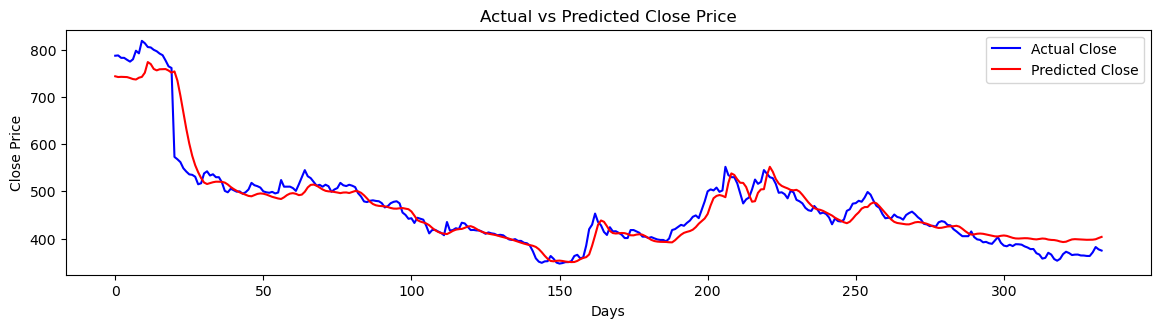

In [42]:
# Plot actual vs predicted values for Close and PE Ratio
plt.figure(figsize=(14, 7))

# Plot Close
plt.subplot(2, 1, 1)
plt.plot(X_test_close, label="Actual Close", color="blue")
plt.plot(y_pred_close, label="Predicted Close", color="red")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()


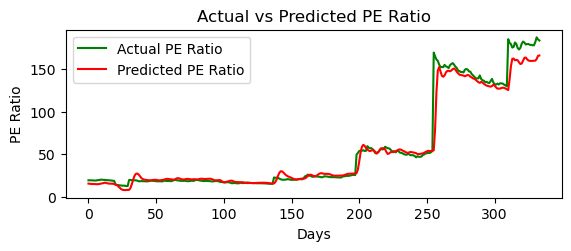

In [43]:
# Plot PE Ratio
plt.subplot(2, 1, 2)
plt.plot(X_test_pe, label="Actual PE Ratio", color="green")
plt.plot(y_pred_pe, label="Predicted PE Ratio",  color="red")
plt.xlabel("Days")
plt.ylabel("PE Ratio")
plt.title("Actual vs Predicted PE Ratio")
plt.legend()